<a href="https://colab.research.google.com/github/fadhan654/latihan1/blob/main/ImageSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload an image...


Saving fadhlan.jpg to fadhlan.jpg


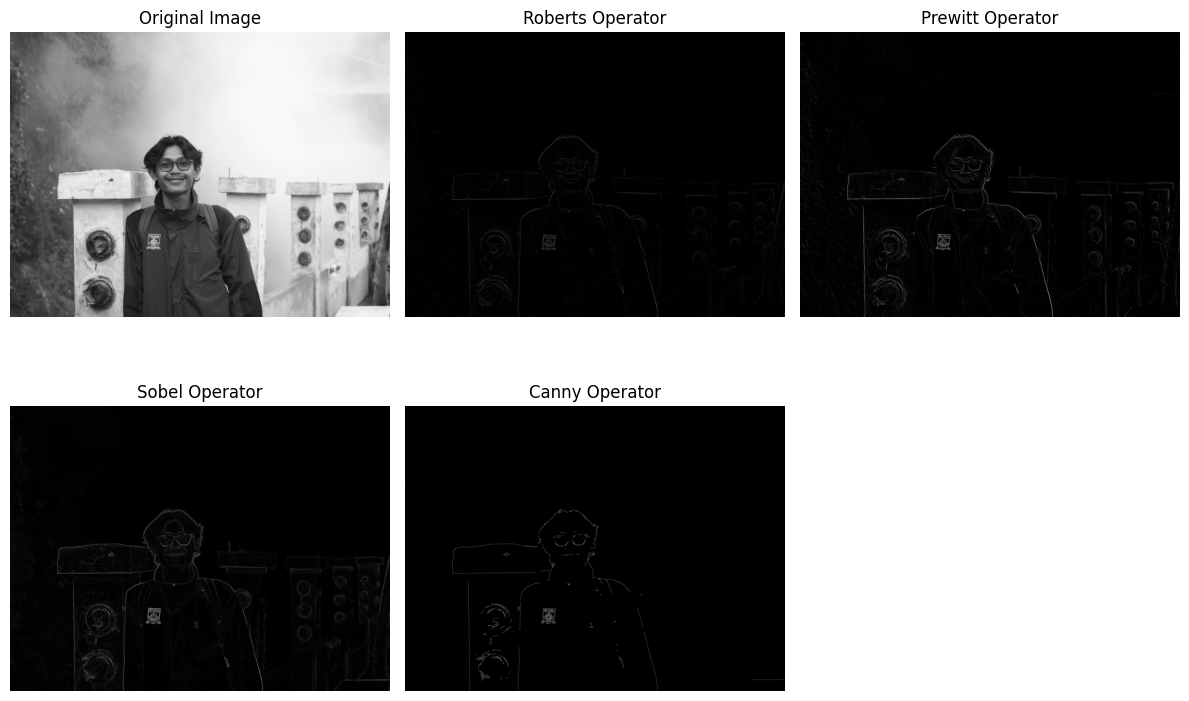

In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import files

# Function to upload and display image
def upload_image():
    uploaded = files.upload()
    image_name = list(uploaded.keys())[0]
    image = Image.open(image_name)
    return image, image_name

# Convert PIL Image to numpy array for OpenCV processing
def pil_to_cv2(image):
    return np.array(image.convert('L'))  # Convert to grayscale

# Deteksi tepi menggunakan berbagai operator
def roberts_operator(image):
    kernel_x = np.array([[1, 0], [0, -1]])
    kernel_y = np.array([[0, 1], [-1, 0]])
    edge_x = cv2.filter2D(image, -1, kernel_x)
    edge_y = cv2.filter2D(image, -1, kernel_y)
    return cv2.magnitude(edge_x.astype(np.float32), edge_y.astype(np.float32))

def prewitt_operator(image):
    kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    edge_x = cv2.filter2D(image, -1, kernel_x)
    edge_y = cv2.filter2D(image, -1, kernel_y)
    return cv2.magnitude(edge_x.astype(np.float32), edge_y.astype(np.float32))

def sobel_operator(image):
    edge_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    edge_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    return cv2.magnitude(edge_x, edge_y)

def canny_operator(image, threshold1, threshold2):
    return cv2.Canny(image, threshold1, threshold2)

# Main Program
if __name__ == "__main__":
    try:
        # Upload image and convert it
        print("Please upload an image...")
        image, image_name = upload_image()
        image_cv2 = pil_to_cv2(image)  # Convert to OpenCV format

        # Deteksi tepi
        roberts_edges = roberts_operator(image_cv2)
        prewitt_edges = prewitt_operator(image_cv2)
        sobel_edges = sobel_operator(image_cv2)
        canny_edges = canny_operator(image_cv2, 100, 200)

        # Plot hasil
        plt.figure(figsize=(12, 8))

        plt.subplot(2, 3, 1)
        plt.title("Original Image")
        plt.imshow(image_cv2, cmap="gray")
        plt.axis("off")

        plt.subplot(2, 3, 2)
        plt.title("Roberts Operator")
        plt.imshow(roberts_edges, cmap="gray")
        plt.axis("off")

        plt.subplot(2, 3, 3)
        plt.title("Prewitt Operator")
        plt.imshow(prewitt_edges, cmap="gray")
        plt.axis("off")

        plt.subplot(2, 3, 4)
        plt.title("Sobel Operator")
        plt.imshow(sobel_edges, cmap="gray")
        plt.axis("off")

        plt.subplot(2, 3, 5)
        plt.title("Canny Operator")
        plt.imshow(canny_edges, cmap="gray")
        plt.axis("off")

        plt.tight_layout()
        plt.show()

    except FileNotFoundError as e:
        print(e)
